In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medium-articles-dataset/medium_data.csv
/kaggle/input/medium-articles-dataset/images/6249.jpg
/kaggle/input/medium-articles-dataset/images/1846.jpg
/kaggle/input/medium-articles-dataset/images/6096.jpeg
/kaggle/input/medium-articles-dataset/images/1160.png
/kaggle/input/medium-articles-dataset/images/5532.jpg
/kaggle/input/medium-articles-dataset/images/206.png
/kaggle/input/medium-articles-dataset/images/1330.jpeg
/kaggle/input/medium-articles-dataset/images/327.jpeg
/kaggle/input/medium-articles-dataset/images/4412.jpeg
/kaggle/input/medium-articles-dataset/images/4755.jpg
/kaggle/input/medium-articles-dataset/images/3092.jpeg
/kaggle/input/medium-articles-dataset/images/2553.jpg
/kaggle/input/medium-articles-dataset/images/3352.jpeg
/kaggle/input/medium-articles-dataset/images/2026.jpg
/kaggle/input/medium-articles-dataset/images/5199.jpeg
/kaggle/input/medium-articles-dataset/images/3417.jpg
/kaggle/input/medium-articles-dataset/images/4117.jpeg
/kaggle/input/medium-a

In [2]:
data =pd.read_csv('/kaggle/input/medium-articles-dataset/medium_data.csv')
data

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30
...,...,...,...,...,...,...,...,...,...,...
6503,6504,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,6504.jpg,661,6,6,Better Marketing,2019-12-05
6504,6505,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,6505.jpeg,189,1,5,Better Marketing,2019-12-05
6505,6506,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,6506.jpg,207,1,8,Better Marketing,2019-12-05
6506,6507,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,6507.jpg,253,2,5,Better Marketing,2019-12-05


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


### Lets convert Data into proper format

In [4]:
#removing an invalid input from resp
data = data.drop(data[data['responses']=='Read'].index)

In [5]:
data['date'] = pd.to_datetime(data['date'])
data['responses'] = data['responses'].astype(int)

### Lets do some Data Analysis on Publications

In [6]:
data['publication'].value_counts()

The Startup                3041
Towards Data Science       1461
Data Driven Investor        777
UX Collective               554
The Writing Cooperative     403
Better Marketing            242
Better Humans                28
Name: publication, dtype: int64

In [7]:
pubs = data['publication'].value_counts().reset_index()
pubs

,index,publication
0,The Startup,3041
1,Towards Data Science,1461
2,Data Driven Investor,777
3,UX Collective,554
4,The Writing Cooperative,403
5,Better Marketing,242
6,Better Humans,28


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

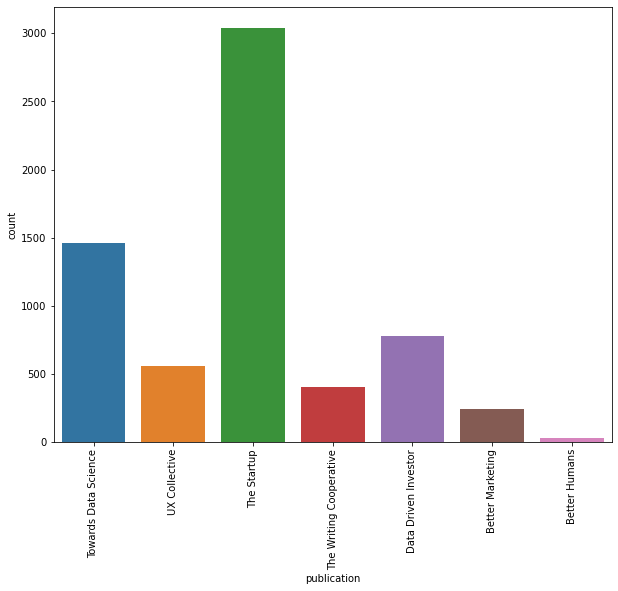

In [8]:
plt.figure(figsize = (10,8))
sns.countplot(data['publication'])
plt.xticks(rotation = 90)

In [9]:
reps = data.groupby('publication')['responses'].sum().sort_values(ascending = False).reset_index()
reps

,publication,responses
0,The Startup,5449
1,Towards Data Science,2531
2,The Writing Cooperative,1275
3,Better Marketing,1118
4,UX Collective,815
5,Data Driven Investor,290
6,Better Humans,239


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

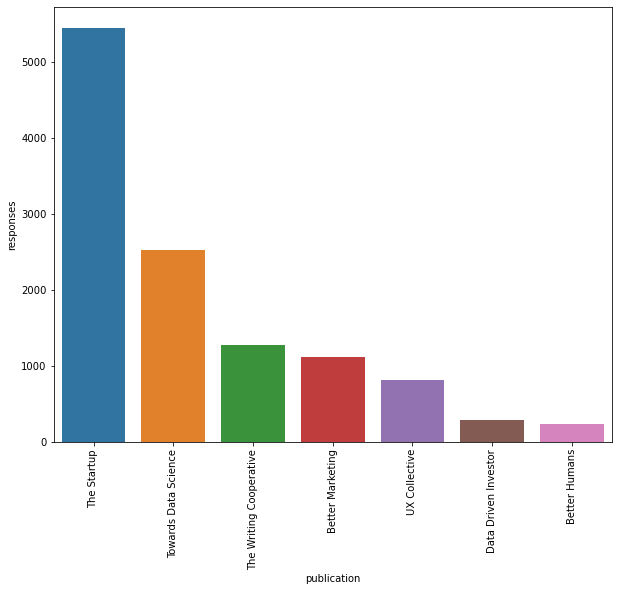

In [10]:
plt.figure(figsize = (10,8))
sns.barplot(data = reps, x= 'publication', y='responses')
plt.xticks(rotation = 90)

### This graph shows the number of responses that was received by the Publishers


In [11]:
data

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30
...,...,...,...,...,...,...,...,...,...,...
6503,6504,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,6504.jpg,661,6,6,Better Marketing,2019-12-05
6504,6505,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,6505.jpeg,189,1,5,Better Marketing,2019-12-05
6505,6506,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,6506.jpg,207,1,8,Better Marketing,2019-12-05
6506,6507,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,6507.jpg,253,2,5,Better Marketing,2019-12-05


In [12]:
read = reps = data.groupby('publication')['reading_time'].sum().sort_values(ascending = False).reset_index()
read

,publication,reading_time
0,The Startup,17961
1,Towards Data Science,10631
2,Data Driven Investor,4058
3,UX Collective,3342
4,The Writing Cooperative,2001
5,Better Marketing,1551
6,Better Humans,374


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

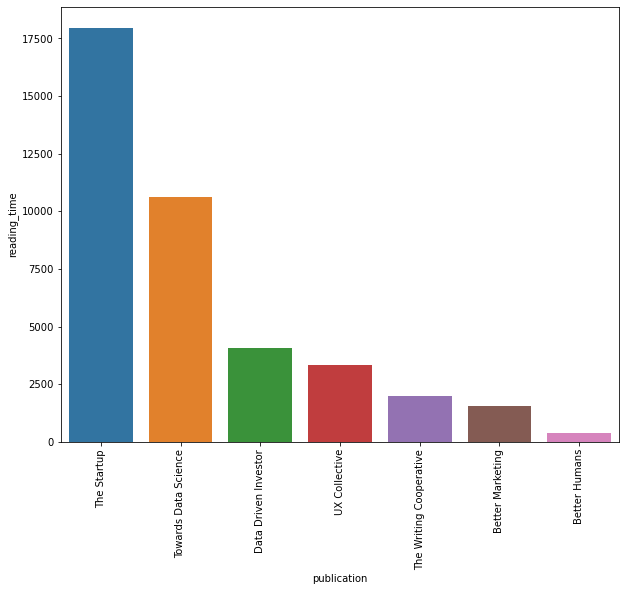

In [13]:
plt.figure(figsize = (10,8))
sns.barplot(data = read, x= 'publication', y='reading_time')
plt.xticks(rotation = 90)

In [14]:
claps = data.groupby('publication')['claps'].sum().sort_values(ascending = False).reset_index()
claps

,publication,claps
0,The Startup,922651
1,Towards Data Science,414386
2,UX Collective,211339
3,Better Marketing,200702
4,The Writing Cooperative,150216
5,Data Driven Investor,73864
6,Better Humans,51178


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

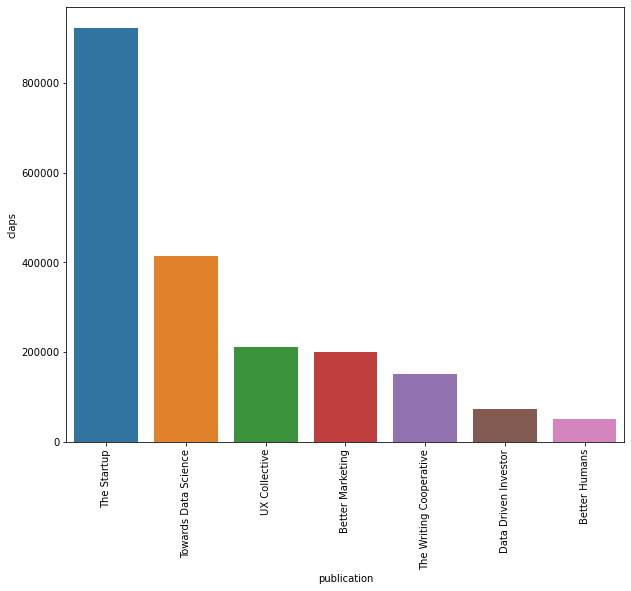

In [15]:
plt.figure(figsize = (10,8))
sns.barplot(data = claps, x= 'publication', y='claps')
plt.xticks(rotation = 90)

In [16]:
data['month'] = data['date'].dt.month
data

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date,month
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30,5
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30,5
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30,5
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30,5
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30,5
...,...,...,...,...,...,...,...,...,...,...,...
6503,6504,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,6504.jpg,661,6,6,Better Marketing,2019-12-05,12
6504,6505,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,6505.jpeg,189,1,5,Better Marketing,2019-12-05,12
6505,6506,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,6506.jpg,207,1,8,Better Marketing,2019-12-05,12
6506,6507,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,6507.jpg,253,2,5,Better Marketing,2019-12-05,12


In [17]:
date_gr = data.groupby('month')['publication'].count().sort_values(ascending = False).reset_index()
date_gr

,month,publication
0,5,1252
1,10,875
2,7,816
3,12,613
4,3,577
5,9,523
6,6,480
7,11,426
8,4,384
9,2,251


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

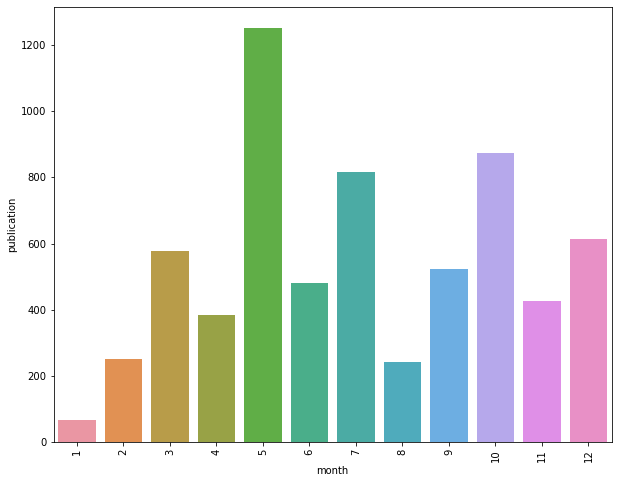

In [18]:
plt.figure(figsize = (10,8))
sns.barplot(data = date_gr, x= 'month', y='publication')
plt.xticks(rotation = 90)

### We see that the highest publications submitted is in the month of MAY
### And the least publications submitted in the monht of January.

In [19]:
dis = ['claps','responses','reading_time']
dist = pd.DataFrame(data[dis])
dist

,claps,responses,reading_time
0,850,8,8
1,1100,11,9
2,767,1,5
3,354,0,4
4,211,3,4
...,...,...,...
6503,661,6,6
6504,189,1,5
6505,207,1,8
6506,253,2,5


In [20]:
data[dis].describe()

,claps,responses,reading_time
count,6506.000000,6506.000000,6506.000000
mean,311.149093,1.800953,6.135567
std,950.926920,5.504400,3.232151
min,0.000000,0.000000,0.000000
25%,54.000000,0.000000,4.000000
50%,115.000000,0.000000,5.000000
75%,268.750000,2.000000,7.000000
max,38000.000000,170.000000,55.000000


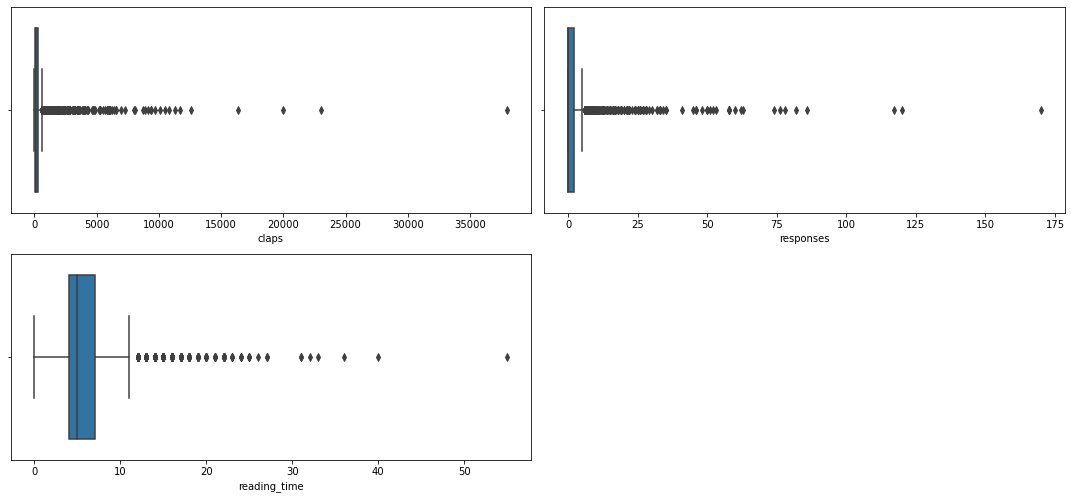

In [21]:
fig = plt.figure(figsize = (15,10))
for index,col in enumerate(dist):
    plt.subplot(3,2,index+1)
    sns.boxplot(x = dist.loc[:,col])
fig.tight_layout(pad=1.0)

In [22]:
pub_clap = data.groupby('title')['claps'].max().sort_values(ascending= False).head(10).reset_index()
pub_clap

,title,claps
0,I Have 15 ideas To Change Your Life. Do you Ha...,38000
1,How To Handle Other People’s Bad Moods Like a Pro,23000
2,"<strong class=""markup--strong markup--h3-stron...",20000
3,How To Break A Negative Thought Loop,16400
4,10 Things To Do When Medium Doesn’t Curate You...,12600
5,How To Retain More From The Books You Read,11700
6,The Only 3 Types of Writing People Actually Wa...,11300
7,"<strong class=""markup--strong markup--h3-stron...",10800
8,10 best Chrome extensions for designers,10500
9,How to Write and Publish Articles that get Not...,10100


In [23]:
pub_resp = data.groupby('title')['responses'].max().sort_values(ascending= False).head(10).reset_index()
pub_resp

,title,responses
0,I Have 15 ideas To Change Your Life. Do you Ha...,170
1,9 Things You Should Never Do on an Airplane,120
2,10 Things To Do When Medium Doesn’t Curate You...,117
3,The McDonaldization of UX,86
4,How to Write and Publish Articles that get Not...,82
5,"<strong class=""markup--strong markup--h3-stron...",78
6,The Only 3 Types of Writing People Actually Wa...,76
7,How To Handle Other People’s Bad Moods Like a Pro,74
8,5 Things I Wish I Knew When I First Started Bl...,63
9,Why Millennials Quit: A Letter To Incompetent ...,62


## Articles with Number on their title, tend to have alot of claps and Responses

In [24]:
pub_clap_min = data.groupby('title')['claps'].max().sort_values(ascending= True).head(10).reset_index()
pub_clap_min

,title,claps
0,Huawei abandoned by Google and major US chipma...,0
1,How random is a random number?,0
2,Stop Complaining and Speak Up!,0
3,Medicaid ‘Work Rules’ Begins to Unfold in the U.S,0
4,Confronting the consequence,0
5,Self-driving cars: From A to Z(Module 1) — 3(I...,0
6,Go behind CPA Go Return of Investment (ROI),0
7,Writing a Press Release? Don’t Make These Mist...,0
8,"Conquering The Home, One Shirt At A Time",0
9,The Art of Platform Governance,0


In [25]:
pub_resp_min = data.groupby('title')['responses'].max().sort_values(ascending= True).head(10).reset_index()
pub_resp_min

,title,responses
0,Intro to Reading and Writing Spreadsheets with...,0
1,Making mayonnaise and design thinking,0
2,Making the Most out of Remote Ideation,0
3,Making the case for ‘the good stuff’,0
4,Making your first Convolutional Neural Network...,0
5,Managing Business Analysis Information into Re...,0
6,Managing Your Design Feedback,0
7,Managing the Need to Provide,0
8,Managing virtual environment with pyenv,0
9,Mapping knowledge with digital tools to solve ...,0
